In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
mnist_fashion = keras.datasets.fashion_mnist

In [5]:
(x_train,y_train), (x_test,y_test) = mnist_fashion.load_data()

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


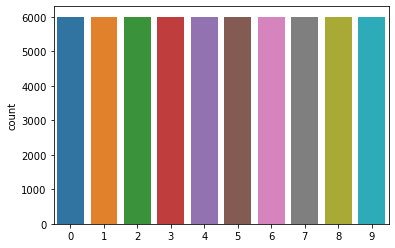

In [10]:
sns.countplot(y_train)

In [12]:
x_train = x_train.reshape([60000, 28, 28, 1])
x_test = x_test.reshape([10000, 28, 28, 1])

In [13]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1)
train_datagen.fit(x_train)

In [18]:
val_datagen = ImageDataGenerator(
    rescale = 1./255)
val_datagen.fit(x_test)

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [21]:
from keras.optimizers import Adam
model.compile(optimizer = Adam() , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [23]:
training = model.fit(train_datagen.flow(x_train,y_train, batch_size = 64), validation_data = val_datagen.flow(x_test, y_test),
                    batch_size = 64,
                    epochs = 30,
                    verbose = 1)

Epoch 1/30
938/938 [==============================] - 192s 202ms/step - loss: 0.6184 - accuracy: 0.7673 - val_loss: 0.4263 - val_accuracy: 0.8376
Epoch 2/30
938/938 [==============================] - 143s 152ms/step - loss: 0.4163 - accuracy: 0.8438 - val_loss: 0.3393 - val_accuracy: 0.8777
Epoch 3/30
938/938 [==============================] - 139s 148ms/step - loss: 0.3664 - accuracy: 0.8625 - val_loss: 0.3295 - val_accuracy: 0.8773
Epoch 4/30
938/938 [==============================] - 133s 142ms/step - loss: 0.3327 - accuracy: 0.8735 - val_loss: 0.2885 - val_accuracy: 0.8906
Epoch 5/30
938/938 [==============================] - 130s 138ms/step - loss: 0.3126 - accuracy: 0.8825 - val_loss: 0.3008 - val_accuracy: 0.8947
Epoch 6/30
938/938 [==============================] - 129s 138ms/step - loss: 0.2983 - accuracy: 0.8877 - val_loss: 0.2707 - val_accuracy: 0.8992
Epoch 7/30
938/938 [==============================] - 130s 139ms/step - loss: 0.2842 - accuracy: 0.8921 - val_loss: 0.2595 -

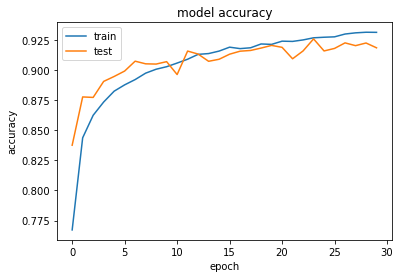

In [25]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

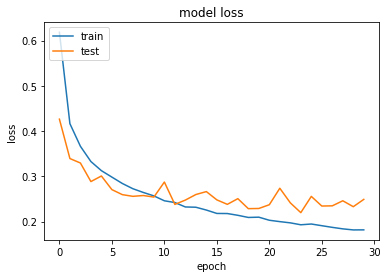

In [26]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model.save("fashion_mnist.h5")